###Task 2: Quarks and Gluons
Task involves making a classification model to distinguish quark or gluon jets.

Upon trying various models, concluded that almost all give the same accuracy.

I have used the Logisitic Regression model.

##Loading Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

##Loading Data

In [4]:
data = np.load('QG_jets.npz')

print(data)

NpzFile 'QG_jets.npz' with keys: X, y


##Assigning Features to X and target to Y

In [5]:
X = data['X']
y = data['y']

print("X shape:", X.shape) #revealed 3-d array
print("y shape:", y.shape)

X shape: (100000, 139, 4)
y shape: (100000,)


In [6]:
print(X[0]) #revealed many zero entires

[[ 2.68769142e-01  3.56903171e-01  4.74138734e+00  2.20000000e+01]
 [ 1.60076377e-01 -2.55609533e-01  4.55022910e+00  2.20000000e+01]
 [ 1.14868731e+00 -6.24380156e-02  4.50385377e+00 -2.11000000e+02]
 [ 4.13159146e+00  1.73686350e-01  4.76622410e+00 -3.21000000e+02]
 [ 1.69599701e+00 -2.12177764e-01  4.79687162e+00 -2.11000000e+02]
 [ 2.19372581e+00 -5.24780791e-02  4.57559636e+00  2.20000000e+01]
 [ 1.61909680e+00 -6.76247614e-02  4.64561192e+00  2.20000000e+01]
 [ 6.59214883e+00  4.42691311e-02  4.76597141e+00  2.11000000e+02]
 [ 3.77096258e+00  4.22475280e-02  4.75473207e+00  3.21000000e+02]
 [ 1.34816345e+01 -2.80005472e-02  4.73543183e+00 -2.11000000e+02]
 [ 4.10794493e+00 -2.37648715e-02  4.75891312e+00  2.20000000e+01]
 [ 2.16455176e+01 -2.69973695e-02  4.75997450e+00  2.20000000e+01]
 [ 6.77551168e+00 -2.97549224e-02  4.76127746e+00  2.20000000e+01]
 [ 1.32550803e+01 -3.94389998e-02  4.74948328e+00  2.20000000e+01]
 [ 2.98350842e+00 -3.66033986e-02  4.74619579e+00  2.20000000e

Modifying X

In [7]:
X = np.where(X == 0, np.nan, X) #removing zero entires

X = np.nanmean(X, axis=1) #converting to 2-d by taking mean

print(X)

[[ 2.78231806e+01 -1.77256379e-02  4.71509695e+00 -8.77777778e+00]
 [ 3.12828409e+01  1.66467043e-01  3.02062727e+00 -9.88235294e+00]
 [ 8.89669563e+00 -1.37702443e+00  4.87845109e-01 -6.43157895e+01]
 ...
 [ 3.42609492e+01  1.01293798e+00  4.56279076e+00 -1.03687500e+02]
 [ 6.20155106e+00  2.58253519e-01  3.87450781e+00 -1.13863636e+01]
 [ 1.36461232e+01  1.03797887e+00  1.37801151e+00  3.23250000e+01]]


In [8]:
print(X.shape)

(100000, 4)


Setting up Data Frame

In [9]:
df = pd.DataFrame(X)
df['label'] = y
df.columns=['1', '2', '3', '4', 'label']
print(df.head())

           1         2         3          4  label
0  27.823181 -0.017726  4.715097  -8.777778    1.0
1  31.282841  0.166467  3.020627  -9.882353    1.0
2   8.896696 -1.377024  0.487845 -64.315789    1.0
3  13.703112  0.666248  5.545959  78.567568    1.0
4  15.118487 -0.388895  4.536264   5.942857    1.0


Finding signicant featuresusing ANOVA (Analysis of Variance)

In [10]:
from sklearn.feature_selection import f_classif

f_values, p_values = f_classif(df.drop(columns='label'), df['label'])

print(f_values) #high f-value tells us that the feature causes high variation
print(p_values) #low p-value (probabilty) confirms that the feature is significant

[3.26253409e+04 1.16933827e+00 5.99197943e-01 6.37913082e+02]
[0.00000000e+000 2.79539857e-001 4.38886041e-001 2.62516039e-140]


Adding another feature, which is product of Feature 1 and Feature 2

In [11]:
fea1=df['1']
fea4=df['4']
fea5=fea1*fea4
df['5']=fea5

In [12]:
df=df[['1', '2', '3', '4', '5', 'label']]
print(df.head())

           1         2         3          4            5  label
0  27.823181 -0.017726  4.715097  -8.777778  -244.225696    1.0
1  31.282841  0.166467  3.020627  -9.882353  -309.148075    1.0
2   8.896696 -1.377024  0.487845 -64.315789  -572.198003    1.0
3  13.703112  0.666248  5.545959  78.567568  1076.620176    1.0
4  15.118487 -0.388895  4.536264   5.942857    89.847009    1.0


Finding significant features again

In [13]:
from sklearn.feature_selection import f_classif


f_values, p_values = f_classif(df.drop(columns='label'), df['label'])


print(f_values) #here it is revealed that the new feature is more signicant than feature 4, thus will use it
print(p_values)

[3.26253409e+04 1.16933827e+00 5.99197943e-01 6.37913082e+02
 1.83320239e+03]
[0.00000000e+000 2.79539857e-001 4.38886041e-001 2.62516039e-140
 0.00000000e+000]


Setting X = Feature 1 and Feature 5; y = Target

In [14]:
X = df[['1', '5']]
y = df['label']

##Visualizing

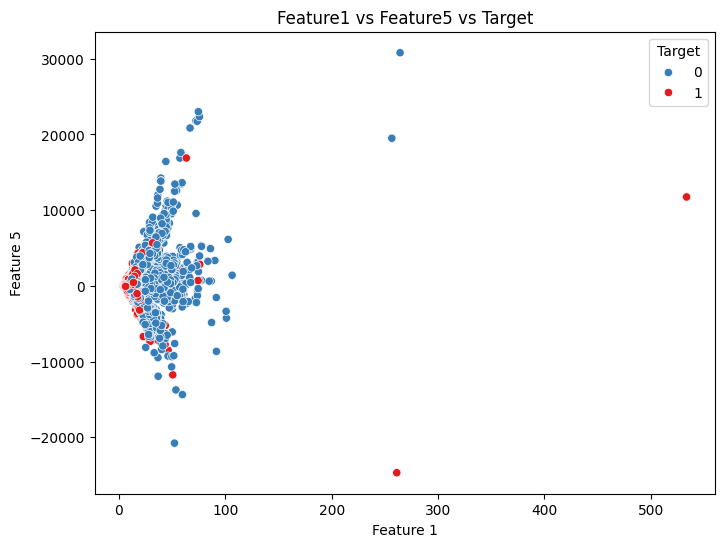

In [39]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='1', y='5', hue='label', data=df, palette='Set1')
plt.title('Feature1 vs Feature5 vs Target')
plt.xlabel('Feature 1')
plt.ylabel('Feature 5')
plt.legend(title='Target', labels=['0', '1'])
plt.show()


Splitting X and Y into Training and Testing

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

Scaling using Standard Scaler

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

##Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


#Setting up Model
model = LogisticRegression(random_state=50)

#Training Model
model.fit(X_train_std, y_train)

#Predicting
y_pred = model.predict(X_test_std)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.77105
